# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:, 13]

# Create dummy variables

In [6]:
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

# Concatenate the Data Frames

In [ ]:
X = pd.concat([X,geography,gender],axis=1)
X = X.drop(['Geography','Gender'],axis=1)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# HyperParameter Optimisation

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

In [ ]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
           
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            
    model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))
    model.compile(optimizer='adam',  loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs = [30])
grid = GridSearchCV(estimator=model, param_grid = param_grid, cv=5)

In [ ]:
grid_result = grid.fit(X_train, y_train)

In [ ]:
[grid_result.best_score_, grid_result.best_params_]

In [ ]:
pred_y = grid.predict(X_test)

In [ ]:
y_pred = (pred_y > 0.5)

In [ ]:
y_pred

# ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
classifier = Sequential()

# Creating hidden layers

In [ ]:
classifier.add(Dense(units = 6, kernel_initializer = "he_uniform", activation="relu",input_dim = 11))

In [ ]:
classifier.add(Dense(units =6, kernel_initializer = "he_uniform",activation="relu"))

In [ ]:
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform",activation="sigmoid"))

# Compiling the ANN

In [52]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy" ,metrics = ["accuracy"])

# Fitting the ANN to the Training Set

In [56]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3255 - accuracy: 0.8643 - val_loss: 0.3532 - val_accuracy: 0.8523
Epoch 2/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3246 - accuracy: 0.8653 - val_loss: 0.3530 - val_accuracy: 0.8550
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3256 - accuracy: 0.8666 - val_loss: 0.3518 - val_accuracy: 0.8538
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3245 - accuracy: 0.8658 - val_loss: 0.3519 - val_accuracy: 0.8535
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3249 - accuracy: 0.8636 - val_loss: 0.3525 - val_accuracy: 0.8523
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3248 - accuracy: 0.8664 - val_loss: 0.3515 - val_accuracy: 0.8546
Epoch 7/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3245 - accuracy: 0.8660 - val_loss: 0.3543 - val_accuracy: 0.8508

Epoch 58/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3231 - accuracy: 0.8664 - val_loss: 0.3517 - val_accuracy: 0.8561
Epoch 59/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3224 - accuracy: 0.8681 - val_loss: 0.3539 - val_accuracy: 0.8523
Epoch 60/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3224 - accuracy: 0.8666 - val_loss: 0.3502 - val_accuracy: 0.8542
Epoch 61/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3220 - accuracy: 0.8670 - val_loss: 0.3509 - val_accuracy: 0.8538
Epoch 62/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3219 - accuracy: 0.8673 - val_loss: 0.3530 - val_accuracy: 0.8527
Epoch 63/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3220 - accuracy: 0.8679 - val_loss: 0.3533 - val_accuracy: 0.8535
Epoch 64/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3224 - accuracy: 0.8686 - val_loss: 0.3526 - val_accuracy:

# Summarise history for loss

In [57]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


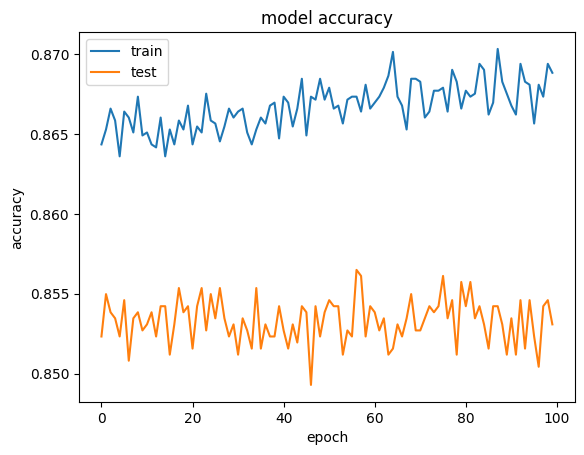

In [59]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()


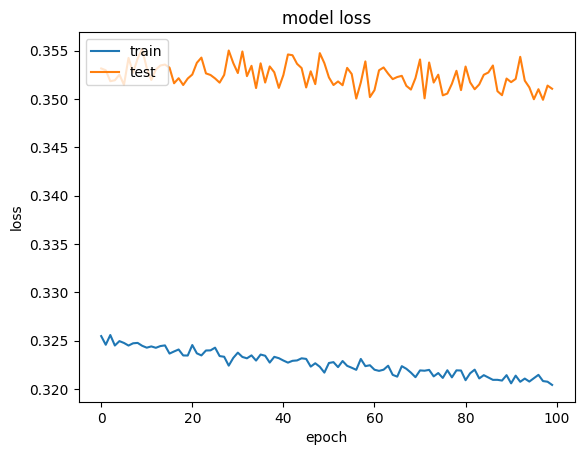

In [60]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()


# Predicting the Test set Results

In [61]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1511,   84],
       [ 198,  207]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.859